In [1]:
#Basic libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#configure visualizations
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 15 , 8

#Train, test split and normalizing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler

#Cross Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve, GridSearchCV

import os, datetime as dt

In [2]:
#Feature selection
from sklearn.feature_selection import RFECV

#ML algo functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

#Metric
from sklearn.metrics import recall_score,roc_auc_score

seed = 19

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.precision', 3)

In [4]:
def info(df):
    size = df.shape[0]
    null = df.isnull().sum()
    nuni = train.nunique()
    dtype = df.dtypes
    missing_pct = null*100/size
    df_info  = pd.concat([dtype, missing_pct.round(2),nuni], axis=1, keys=['type','missing','nunique'])
    df_info.sort_values (['missing'],ascending=False,inplace=True) #null_val.sort_values(ascending=False).round(2)
    return df_info

In [5]:
folder = r"G:\Study material\Data Science\Datasets\Loan_HackerEarth\\"
train_file = "train_indessa.csv"
test_file = "test_indessa.csv"

In [6]:
#Data read
train = pd.read_csv(os.path.join(folder,train_file))
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my high credit cards and get out of debt within 3 years.<br>,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [7]:
train.shape

(532428, 45)

In [8]:
id_col = train.pop('member_id')
target = train.pop('loan_status')

In [9]:
df_info = info(train)
df_info.T

,verification_status_joint,desc,mths_since_last_record,mths_since_last_major_derog,mths_since_last_delinq,batch_enrolled,total_rev_hi_lim,tot_cur_bal,tot_coll_amt,emp_title,revol_util,collections_12_mths_ex_med,title,last_week_pay,initial_list_status,revol_bal,total_acc,total_rec_late_fee,total_rec_int,recoveries,pub_rec,acc_now_delinq,application_type,collection_recovery_fee,loan_amnt,open_acc,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths
type,object,object,float64,float64,float64,object,float64,float64,float64,object,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,float64,int64,float64,int64,float64,object,float64,object,object,object,object,float64,object,object,object,object,object,float64,float64,float64
missing,99.9,85.8,84.6,75,51.2,16,7.89,7.89,7.89,5.79,0.05,0.02,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nunique,3,70638,122,162,147,104,14697,251640,8081,190125,1265,9,39693,98,2,63459,126,4073,243149,14024,28,8,2,12617,1370,73,1370,6442,2,535,7,35,12,6,33988,3,2,14,917,51,4058,26,23


In [10]:
target.value_counts(normalize=True)

0    0.764
1    0.236
Name: loan_status, dtype: float64

In [11]:
train.dtypes.value_counts()

float64    23
object     18
int64       2
dtype: int64

In [12]:
df_reset = train.copy()

In [13]:
#train = df_reset_copy()

## Data Description  
Total columns 43 + member id + target
Possible Leakage: Funded_amt, funded_amnt_inv

In [14]:
#Treating missing values
df_info[df_info['missing'] > 40].shape

(5, 3)

In [15]:
df_info[df_info['missing'] > 40]

,type,missing,nunique
verification_status_joint,object,99.94,3
desc,object,85.80,70638
mths_since_last_record,float64,84.58,122
mths_since_last_major_derog,float64,75.02,162
mths_since_last_delinq,float64,51.19,147


In [16]:
drop_missing = list(df_info[df_info['missing'] > 40].index) #Too high missing values

In [17]:
drop_missing

['verification_status_joint',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq']

In [18]:
train.drop(drop_missing, axis =1 , inplace = True)

In [19]:
cat_col = train.dtypes[train.dtypes == "object"].index

In [20]:
#Fill NA by No_value
train[cat_col] = train[cat_col].fillna('missing')

In [21]:
num_missing = list(df_info[(df_info['missing'] > 0) & (df_info['type'] != 'object')].index)

In [22]:
num_missing_after_drop = [col for col in num_missing if col not in drop_missing]

In [23]:
num_missing_after_drop

['total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'revol_util',
 'collections_12_mths_ex_med']

In [24]:
for col in num_missing_after_drop:
    avg = np.mean(train[col].dropna())
    print(col," : ",avg)

total_rev_hi_lim  :  32080.572918535796
tot_cur_bal  :  139554.1107918862
tot_coll_amt  :  213.5622216694126
revol_util  :  55.0571891660288
collections_12_mths_ex_med  :  0.014299320162379564


In [25]:
for col in num_missing_after_drop:
    avg = np.mean(train[col].dropna())
    train[col].fillna(avg,inplace=True)

In [26]:
#Check status
clean_info = info(train)
clean_info.T

,loan_amnt,total_rec_late_fee,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,recoveries,funded_amnt,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,inq_last_6mths,delinq_2yrs,dti,addr_state,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,total_rev_hi_lim
type,int64,float64,float64,float64,float64,float64,float64,object,float64,float64,int64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,object,object,float64,object,object,object,object,object,float64,object,object,object,object,object,float64
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nunique,1370,4073,73,28,63459,1266,126,2,243149,14024,1370,12617,10,2,98,8,8082,251641,23,26,4058,51,6442,2,105,535,7,35,190126,12,6,33988,3,2,14,39694,917,14698


### Data cleaned

In [27]:
clean_info[clean_info['type'] == 'object'].T

,initial_list_status,application_type,last_week_pay,addr_state,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code
type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nunique,2,2,98,51,2,105,7,35,190126,12,6,3,2,14,39694,917


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
bin_cols = []
for col in cat_col:
    if train[col].nunique() <= 2:
        bin_cols.append(col)
        le.fit(train[col])
        train[col] = le.transform(train[col])                

print(bin_cols)

['term', 'pymnt_plan', 'initial_list_status', 'application_type']


In [30]:
#too many unique values
high_nunique_cols = ['emp_title','title','zip_code']

In [31]:
#drop one column from each categorical feature to solve multi collinearity issue
#Drop column with max value count
dummies_2_drop = []
dummies_col = []
for col in cat_col:
    if ((col not in bin_cols) and (col not in high_nunique_cols)):
        dummies_col.append(col)
        dummies_2_drop.append(col+"_"+train[col].value_counts().index[0])
        
dummies_2_drop

['batch_enrolled_ ',
 'grade_B',
 'sub_grade_B3',
 'emp_length_10+ years',
 'home_ownership_MORTGAGE',
 'verification_status_Source Verified',
 'purpose_debt_consolidation',
 'addr_state_CA',
 'last_week_pay_13th week']

In [32]:
dummies_list = pd.DataFrame()
for col in dummies_col:
    dummies_list = pd.concat([dummies_list,pd.get_dummies(train[col],prefix=col)],axis=1)

In [33]:
dummies_list.shape

(532428, 331)

In [34]:
dummies_list.columns

Index(['batch_enrolled_ ', 'batch_enrolled_BAT1104812', 'batch_enrolled_BAT1135695', 'batch_enrolled_BAT1184694', 'batch_enrolled_BAT1273836', 'batch_enrolled_BAT1327206', 'batch_enrolled_BAT1467036', 'batch_enrolled_BAT1521494', 'batch_enrolled_BAT1575727', 'batch_enrolled_BAT1586599',
       ...
       'last_week_pay_82th week', 'last_week_pay_83th week', 'last_week_pay_87th week', 'last_week_pay_8th week', 'last_week_pay_91th week', 'last_week_pay_92th week', 'last_week_pay_95th week', 'last_week_pay_96th week', 'last_week_pay_9th week', 'last_week_pay_NAth week'], dtype='object', length=331)

In [35]:
train = pd.concat([train,dummies_list],axis=1)

In [36]:
train.drop(dummies_col,inplace=True,axis=1)

In [37]:
train.drop(dummies_2_drop,inplace=True,axis=1)

In [38]:
train.shape

(532428, 351)

In [39]:
[col for col in train.columns if 'grade' in col] #Grade and sub grade are ordinal but is A > E or E > A

['grade_A',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5']

In [40]:
'''
corr = train.corr()
plt.subplots( figsize =( 16 , 10 ) )
sns.heatmap(corr)
plt.show()
'''

'\ncorr = train.corr()\nplt.subplots( figsize =( 16 , 10 ) )\nsns.heatmap(corr)\nplt.show()\n'

In [41]:
'''
grade_dict = {'A': 1, 'B': 2, 'C':3, 'D':4,'E':5,'F':6,'G':7}
train['grade_new'] = train['grade'].apply(lambda x: grade_dict[x])
train['sub_grade_new'] = train['sub_grade'].apply(lambda x: int(str(grade_dict[x[0]])+x[1]))
'''

"\ngrade_dict = {'A': 1, 'B': 2, 'C':3, 'D':4,'E':5,'F':6,'G':7}\ntrain['grade_new'] = train['grade'].apply(lambda x: grade_dict[x])\ntrain['sub_grade_new'] = train['sub_grade'].apply(lambda x: int(str(grade_dict[x[0]])+x[1]))\n"

In [42]:
#train['emp_length'].unique()

In [43]:
'''
emp_len = {'< 1 year' : 0, '1 year' : 1,'2 years' : 2, '10+ years' :10, '5 years' : 5, '7 years' : 7, \
           '4 years' : 4, '3 years' : 3, '6 years' : 6,  '8 years' : 8, '9 years' : 9}
train['emp_new'] = train['emp_length'].apply(lambda x: emp_len[x])    
'''           

"\nemp_len = {'< 1 year' : 0, '1 year' : 1,'2 years' : 2, '10+ years' :10, '5 years' : 5, '7 years' : 7,            '4 years' : 4, '3 years' : 3, '6 years' : 6,  '8 years' : 8, '9 years' : 9}\ntrain['emp_new'] = train['emp_length'].apply(lambda x: emp_len[x])    \n"

In [44]:
#train['last_week_pay'] = train['last_week_pay'].apply(lambda x: '0th week' if x == 'NAth week' else x)

In [45]:
import re
#train['last_wk'] = train['last_week_pay'].apply(lambda x: int(re.findall(r'\d{1,4}',x)[0]))

In [46]:
train['emp_title'].head()

0                                clerk
1           Human Resources Specialist
2                               Driver
3    Us office of Personnel Management
4          LAUSD-HOLLYWOOD HIGH SCHOOL
Name: emp_title, dtype: object

In [47]:
train['emp_title'].nunique()

190126

In [48]:
train['title'].head()

0    Debt consolidation
1      Home improvement
2    Debt consolidation
3    Debt consolidation
4                  refi
Name: title, dtype: object

In [49]:
train['title'].nunique()

39694

In [50]:
train['zip_code'].head()

0    349xx
1    209xx
2    447xx
3    221xx
4    900xx
Name: zip_code, dtype: object

In [51]:
train['zip_code'].nunique()

917

In [52]:
train['zip_code'] = train['zip_code'].apply(lambda x: x[0])

In [53]:
train = pd.concat([train,pd.get_dummies(train['zip_code'],prefix='zip')],axis=1)

In [54]:
drop_zip = 'zip_' + train['zip_code'].value_counts().index[0]

In [55]:
train.drop(['emp_title','title','zip_code',drop_zip],axis=1, inplace =True)

In [56]:
train.dtypes.value_counts()

uint8      331
float64     20
int64        6
dtype: int64

In [57]:
final_test = info(train)
final_test.T

,loan_amnt,addr_state_MO,addr_state_UT,addr_state_TX,addr_state_TN,addr_state_SD,addr_state_SC,addr_state_RI,addr_state_PA,addr_state_OR,addr_state_OK,addr_state_OH,addr_state_NY,addr_state_NV,addr_state_NM,addr_state_NJ,addr_state_NH,addr_state_NE,addr_state_ND,addr_state_NC,addr_state_MT,addr_state_VA,addr_state_VT,addr_state_WA,last_week_pay_118th week,last_week_pay_143th week,last_week_pay_139th week,last_week_pay_135th week,last_week_pay_131th week,last_week_pay_130th week,last_week_pay_126th week,last_week_pay_122th week,last_week_pay_121th week,last_week_pay_117th week,addr_state_WI,last_week_pay_113th week,last_week_pay_109th week,last_week_pay_108th week,last_week_pay_104th week,last_week_pay_100th week,last_week_pay_0th week,addr_state_WY,addr_state_WV,addr_state_MS,addr_state_MN,emp_length_< 1 year,addr_state_MI,purpose_vacation,purpose_small_business,purpose_renewable_energy,purpose_other,purpose_moving,purpose_medical,purpose_major_purchase,purpose_house,purpose_home_improvement,purpose_educational,purpose_credit_card,purpose_car,verification_status_Verified,verification_status_Not Verified,home_ownership_RENT,home_ownership_OWN,home_ownership_OTHER,home_ownership_NONE,home_ownership_ANY,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_ID,addr_state_ME,addr_state_MD,addr_state_MA,addr_state_LA,addr_state_KY,addr_state_KS,addr_state_IN,addr_state_IL,addr_state_IA,addr_state_AR,addr_state_HI,addr_state_GA,addr_state_FL,addr_state_DE,addr_state_DC,addr_state_CT,addr_state_CO,addr_state_AZ,last_week_pay_144th week,last_week_pay_148th week,last_week_pay_152th week,last_week_pay_153th week,last_week_pay_69th week,last_week_pay_65th week,last_week_pay_61th week,last_week_pay_57th week,last_week_pay_56th week,last_week_pay_52th week,last_week_pay_4th week,last_week_pay_48th week,last_week_pay_44th week,last_week_pay_43th week,last_week_pay_39th week,last_week_pay_35th week,last_week_pay_31th week,last_week_pay_30th week,last_week_pay_304th week,last_week_pay_300th week,last_week_pay_291th week,last_week_pay_283th week,last_week_pay_278th week,last_week_pay_70th week,last_week_pay_74th week,last_week_pay_78th week,last_week_pay_NAth week,zip_7,zip_6,zip_5,zip_4,zip_3,zip_2,zip_1,zip_0,last_week_pay_9th week,last_week_pay_79th week,last_week_pay_96th week,last_week_pay_95th week,last_week_pay_92th week,last_week_pay_91th week,last_week_pay_8th week,last_week_pay_87th week,last_week_pay_83th week,last_week_pay_82th week,last_week_pay_274th week,last_week_pay_270th week,last_week_pay_26th week,last_week_pay_182th week,last_week_pay_204th week,last_week_pay_200th week,last_week_pay_196th week,last_week_pay_192th week,last_week_pay_191th week,last_week_pay_18th week,last_week_pay_187th week,last_week_pay_183th week,last_week_pay_17th week,last_week_pay_209th week,last_week_pay_178th week,last_week_pay_174th week,last_week_pay_170th week,last_week_pay_169th week,last_week_pay_165th week,last_week_pay_161th week,last_week_pay_157th week,last_week_pay_156th week,last_week_pay_205th week,last_week_pay_213th week,last_week_pay_269th week,last_week_pay_239th week,last_week_pay_265th week,last_week_pay_261th week,last_week_pay_257th week,last_week_pay_256th week,last_week_pay_252th week,last_week_pay_248th week,last_week_pay_244th week,last_week_pay_243th week,last_week_pay_235th week,last_week_pay_217th week,last_week_pay_231th week,last_week_pay_230th week,last_week_pay_22th week,last_week_pay_226th week,last_week_pay_222th week,last_week_pay_221th week,last_week_pay_21th week,last_week_pay_218th week,emp_length_n/a,emp_length_9 years,funded_amnt,batch_enrolled_BAT2015867,batch_enrolled_BAT3147293,batch_enrolled_BAT2974007,batch_enrolled_BAT291187,batch_enrolled_BAT2881453,batch_enrolled_BAT2881062,batch_enrolled_BAT2833642,batch_enrolled_BAT2803411,batch_enrolled_BAT2677031,batch_enrolled_BAT2575549,batch_enrolled_BAT2558388,batch_enrolled_BAT2522922,batch_enrolled_BAT2428731,batch_enrolled_BAT2333412,batch_enrolled_BAT233107

In [58]:
train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,batch_enrolled_BAT1104812,batch_enrolled_BAT1135695,batch_enrolled_BAT1184694,batch_enrolled_BAT1273836,batch_enrolled_BAT1327206,batch_enrolled_BAT1467036,batch_enrolled_BAT1521494,batch_enrolled_BAT1575727,batch_enrolled_BAT1586599,batch_enrolled_BAT1691418,batch_enrolled_BAT1755192,batch_enrolled_BAT1761981,batch_enrolled_BAT1766061,batch_enrolled_BAT1780517,batch_enrolled_BAT1864701,batch_enrolled_BAT1914408,batch_enrolled_BAT1930365,batch_enrolled_BAT1942645,batch_enrolled_BAT2003848,batch_enrolled_BAT2015867,batch_enrolled_BAT20678,batch_enrolled_BAT2078974,batch_enrolled_BAT2136391,batch_enrolled_BAT2143459,batch_enrolled_BAT224923,batch_enrolled_BAT2252229,batch_enrolled_BAT2331079,batch_enrolled_BAT2333412,batch_enrolled_BAT2428731,batch_enrolled_BAT2522922,batch_enrolled_BAT2558388,batch_enrolled_BAT2575549,batch_enrolled_BAT2677031,batch_enrolled_BAT2803411,batch_enrolled_BAT2833642,batch_enrolled_BAT2881062,batch_enrolled_BAT2881453,batch_enrolled_BAT291187,batch_enrolled_BAT2974007,batch_enrolled_BAT3147293,batch_enrolled_BAT3157685,batch_enrolled_BAT3160077,batch_enrolled_BAT3193689,batch_enrolled_BAT3260421,batch_enrolled_BAT3275209,batch_enrolled_BAT3292317,batch_enrolled_BAT3372536,batch_enrolled_BAT3461431,batch_enrolled_BAT3474907,batch_enrolled_BAT348786,batch_enrolled_BAT3518025,batch_enrolled_BAT3537993,batch_enrolled_BAT357701,batch_enrolled_BAT3594334,batch_enrolled_BAT3706046,batch_enrolled_BAT3726927,batch_enrolled_BAT3839056,batch_enrolled_BAT3865626,batch_enrolled_BAT3873588,batch_enrolled_BAT3943761,batch_enrolled_BAT3965509,batch_enrolled_BAT3975721,batch_enrolled_BAT4051248,batch_enrolled_BAT4136152,batch_enrolled_BAT4160421,batch_enrolled_BAT4201183,batch_enrolled_BAT4250975,batch_enrolled_BAT4260473,batch_enrolled_BAT4271519,batch_enrolled_BAT4347689,batch_enrolled_BAT4351734,batch_enrolled_BAT447257,batch_enrolled_BAT4694572,batch_enrolled_BAT4722912,batch_enrolled_BAT4726815,batch_enrolled_BAT4734809,batch_enrolled_BAT47674,batch_enrolled_BAT4780022,batch_enrolled_BAT4786748,batch_enrolled_BAT4808022,batch_enrolled_BAT4884699,batch_enrolled_BAT4935307,batch_enrolled_BAT4939736,batch_enrolled_BAT5046385,batch_enrolled_BAT5077496,batch_enrolled_BAT5320519,batch_enrolled_BAT5341619,batch_enrolled_BAT5458862,batch_enrolled_BAT5477261,batch_enrolled_BAT5489674,batch_enrolled_BAT5525466,batch_enrolled_BAT5540558,batch_enrolled_BAT5547201,batch_enrolled_BAT5597801,batch_enrolled_BAT5614983,batch_enrolled_BAT5629144,batch_enrolled_BAT5714674,batch_enrolled_BAT578944,batch_enrolled_BAT5811547,batch_enrolled_BAT5849876,batch_enrolled_BAT5869156,batch_enrolled_BAT5877328,batch_enrolled_BAT5924421,batch_enrolled_missing,grade_A,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a,home_ownership_ANY,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purch

In [59]:
total = pd.concat([train,target],axis=1)

In [60]:
total.dropna(inplace=True)

In [62]:
target = total.pop('loan_status')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(total, target, random_state=seed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(399309, 357) (133103, 357) (399309,) (133103,)


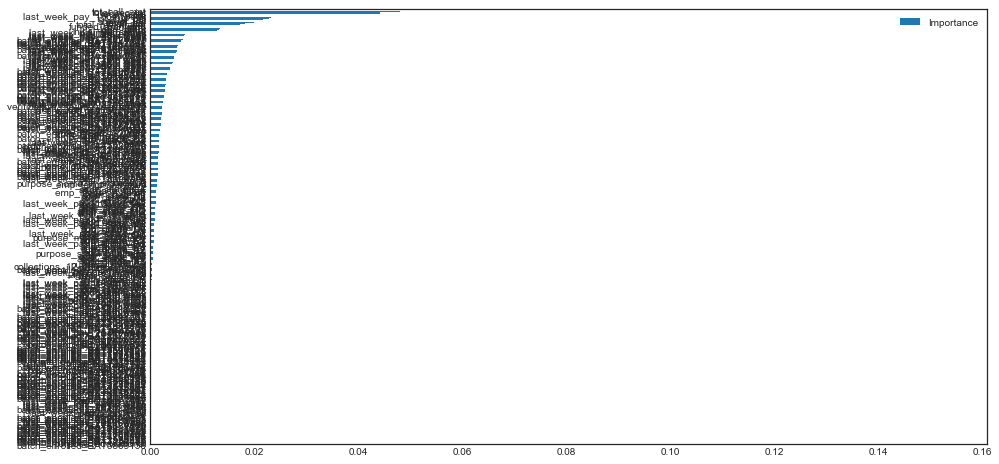

In [66]:
#Feature importance
model = DecisionTreeClassifier(random_state = seed)
model.fit(X_train_scaled,y_train)
imp = pd.DataFrame(model.feature_importances_ ,columns = [ 'Importance' ] , \
                       index = total.columns)
imp = imp.sort_values( [ 'Importance' ] , ascending = True )
imp[:].plot( kind = 'barh' )
plt.show()

In [71]:
imp.iloc[-20:,:]

,Importance
inq_last_6mths,0.008
last_week_pay_30th week,0.010
funded_amnt,0.013
initial_list_status,0.013
loan_amnt,0.013
term,0.014
open_acc,0.014
funded_amnt_inv,0.017
total_rev_hi_lim,0.018
total_acc,0.020


In [72]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled,y_train)
y_predicted = model.predict(X_test_scaled)
print("Train score: ",model.score(X_train_scaled,y_train))
print("Test score: ",model.score(X_test_scaled,y_test))

Train score:  0.847070814833
Test score:  0.847095858095


In [74]:
model.predict_proba(X_train_scaled)[0:]

array([ 0.8913546,  0.1086454])

In [76]:
print("Train roc_auc: ",roc_auc_score(y_train,model.predict_proba(X_train_scaled)[:,1]))
print("Test roc_auc: ",roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1]))    

Train roc_auc:  0.864803971181
Test roc_auc:  0.862760982717


In [ ]:
imp_cols = list(imp.iloc[-20:,:].index)